In [4]:
from matplotlib import pyplot as plt
import pandas
import numpy

In [3]:
# 模型名称和数据
models = {
    "aubmindlab/bert-base-arabertv02": {
        "loss": [0.47216551920823885, 0.38236721403766094, 0.3254364162160639, 0.2788155102938936, 0.2548441711225008, 0.22651647253517518, 0.20296363882851182, 0.17936180521521652, 0.15809628513821383, 0.13443898014854966],
        "sentiments": {
            "anger": 152, "anticipation": 159, "disgust": 153, "fear": 157, "joy": 153, "love": 151,
            "optimism": 153, "pessimism": 132, "sadness": 140, "surprise": 169, "trust": 160
        }
    },
    "asafaya/bert-base-arabic": {
        "loss": [0.4715008182483807, 0.3789739744705066, 0.2972691011010555, 0.24504513792824326, 0.20779794765669002, 0.17370426829969673, 0.1422888652666619, 0.11224126057666645, 0.08506190374232175, 0.0652656524915967],
        "sentiments": {
            "anger": 150, "anticipation": 157, "disgust": 150, "fear": 154, "joy": 152, "love": 146,
            "optimism": 148, "pessimism": 136, "sadness": 139, "surprise": 169, "trust": 156
        }
    },
    
    "bert-base-multilingual-cased": {
        "loss": [0.4669633594521305, 0.39303452780372217, 0.34213936271374684, 0.305123223756489, 0.28025174208900383, 0.2538564774028042, 0.23398460954950567, 0.2139857180285872, 0.1903854747874695, 0.17362732952624035],
        "sentiments": {
            "anger": 133, "anticipation": 157, "disgust": 143, "fear": 155, "joy": 147, "love": 138,
            "optimism": 147, "pessimism": 129, "sadness": 130, "surprise": 169, "trust": 161
        }
    },
    
    "bert-base-uncased": {
        "loss": [0.47169437868553293, 0.4601650207711939, 0.4529044820551287, 0.4266256252924601, 0.3805810170215473, 0.35095613075975785, 0.3234130517955412, 0.30310329470718117, 0.28211386831183183, 0.2636354222632291],
        "sentiments": {
            "anger": 131, "anticipation": 157, "disgust": 148, "fear": 155, "joy": 145, "love": 142,
            "optimism": 145, "pessimism": 133, "sadness": 129, "surprise": 169, "trust": 161
        }
    }
}

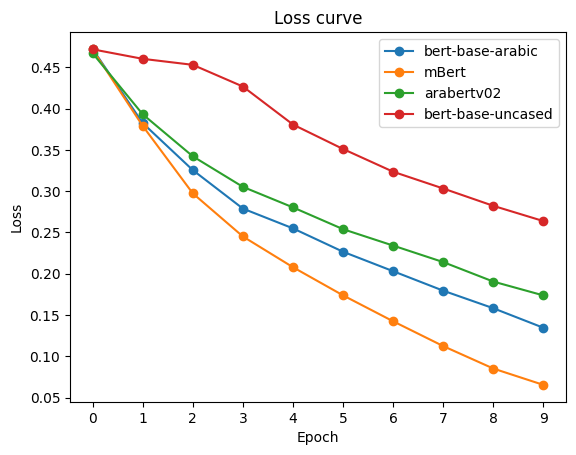

In [40]:
for key in models.keys():
    plt.plot(list(range(10)), models[key]["loss"], "-o")
plt.legend(loss_dic.keys())
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks([int(x) for x in range(10)])
plt.title("Loss curve")
plt.show()

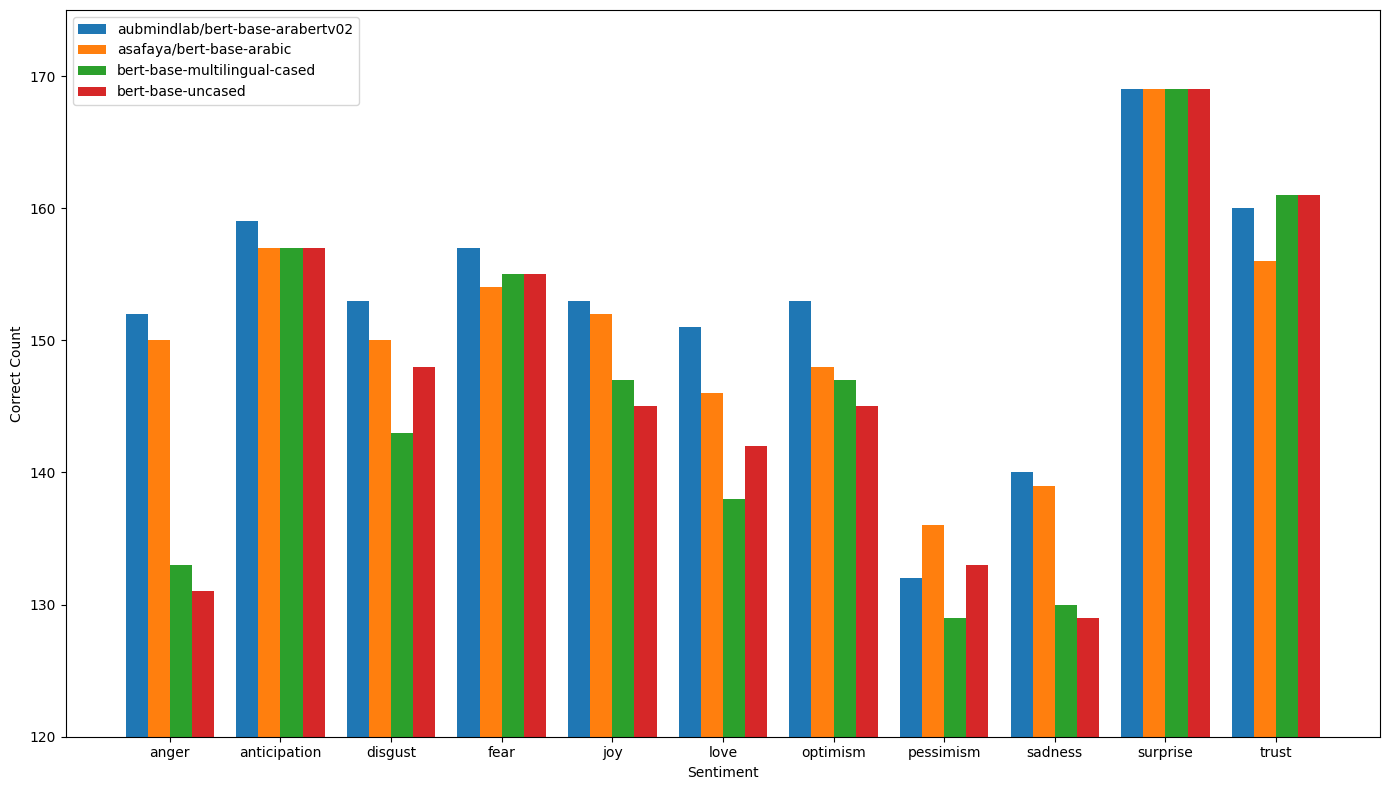

In [39]:
# 提取数据
categories = list(next(iter(models.values()))['sentiments'].keys())
model_names = list(models.keys())
data = {category: [models[model]['sentiments'][category] for model in model_names] for category in categories}

# 绘制柱状图
x = np.arange(len(categories))  # 每个情感类别的位置
width = 0.2  # 每个柱子的宽度

fig, ax = plt.subplots(figsize=(14, 8))

# 每个模型的柱状图
for i, model in enumerate(model_names):
    ax.bar(x + i * width, [data[category][i] for category in categories], width, label=model)

# 添加标签和标题
ax.set_xlabel('Sentiment')
ax.set_ylabel('Correct Count')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(categories)
ax.legend()

plt.ylim(120,175)

# 显示图表
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()